In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import missingno
import seaborn as sns
import pandas_profiling 
import datetime as dt

from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [12]:
path = 'data/2_ecdc/'
notification = pd.read_csv(path+'notification.csv')
notification.name = 'notification'
weekly_notification_eu = pd.read_csv(path+'weeklynotificationeu.csv')
weekly_notification_eu.name = 'weekly_notification_eu'
daily_notification_eu = pd.read_csv(path+'dailynotificationeu.csv')
daily_notification_eu.name = 'daily_notification_eu'
agerange_notification_eu = pd.read_csv(path+'agerangenotificationeu.csv')
agerange_notification_eu.name = 'agerange_notification_eu'
admission_rates =  pd.read_csv(path+'admissionrates.csv')
admission_rates.name = 'admission_rates'
testing = pd.read_csv(path+'testing.csv')
testing.name = 'testing'
response = pd.read_csv(path+'country_response_measures.csv')
response.name = 'response'

In [3]:
# dfs = [notification, weekly_notification_eu, daily_notification_eu, \
#        agerange_notification_eu, admission_rates, testing, response]
# for df in dfs:
#     profile = df.profile_report()
#     profile.to_file(output_file=f"dataset_profiles/{df.name}.html")


In [4]:
# Standardize week and date vals
week_dict = {}
for i in range(10):
    week_dict[f'2020-0{i}'] = int(i)
    week_dict[f'2020-W0{i}'] = int(i)
for i in range(10,53):
    week_dict[f'2020-{i}'] = int(i)
    week_dict[f'2020-W{i}'] = int(i)

notification = notification.replace({"year_week": week_dict})
weekly_notification_eu = weekly_notification_eu.replace({"year_week": week_dict})
admission_rates = admission_rates.replace({"year_week": week_dict})
testing = testing.replace({"year_week": week_dict})
agerange_notification_eu = agerange_notification_eu.replace({"year_week": week_dict})


admission_rates.date = pd.to_datetime(admission_rates.date)
daily_notification_eu.date = pd.to_datetime(daily_notification_eu.date)
response.date_start = pd.to_datetime(response.date_start)
response.date_end = pd.to_datetime(response.date_end)

In [5]:
merged_daily = pd.merge(daily_notification_eu, admission_rates,how='outer', on = ['country','date'])
merged_daily.head()

,country,region_name,nuts_code,date,rate_14_day_per_100k,source_x,indicator,year_week,value,source_y,url
0,Austria,Außerfern,AT331,2020-02-26,NaN,"TESSy COVID-19, subnational daily data",NaN,NaN,NaN,NaN,NaN
1,Austria,Bludenz-Bregenzer Wald,AT341,2020-02-26,NaN,"TESSy COVID-19, subnational daily data",NaN,NaN,NaN,NaN,NaN
2,Austria,Graz,AT221,2020-02-26,NaN,"TESSy COVID-19, subnational daily data",NaN,NaN,NaN,NaN,NaN
3,Austria,Innsbruck,AT332,2020-02-26,NaN,"TESSy COVID-19, subnational daily data",NaN,NaN,NaN,NaN,NaN
4,Austria,Innviertel,AT311,2020-02-26,NaN,"TESSy COVID-19, subnational daily data",NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

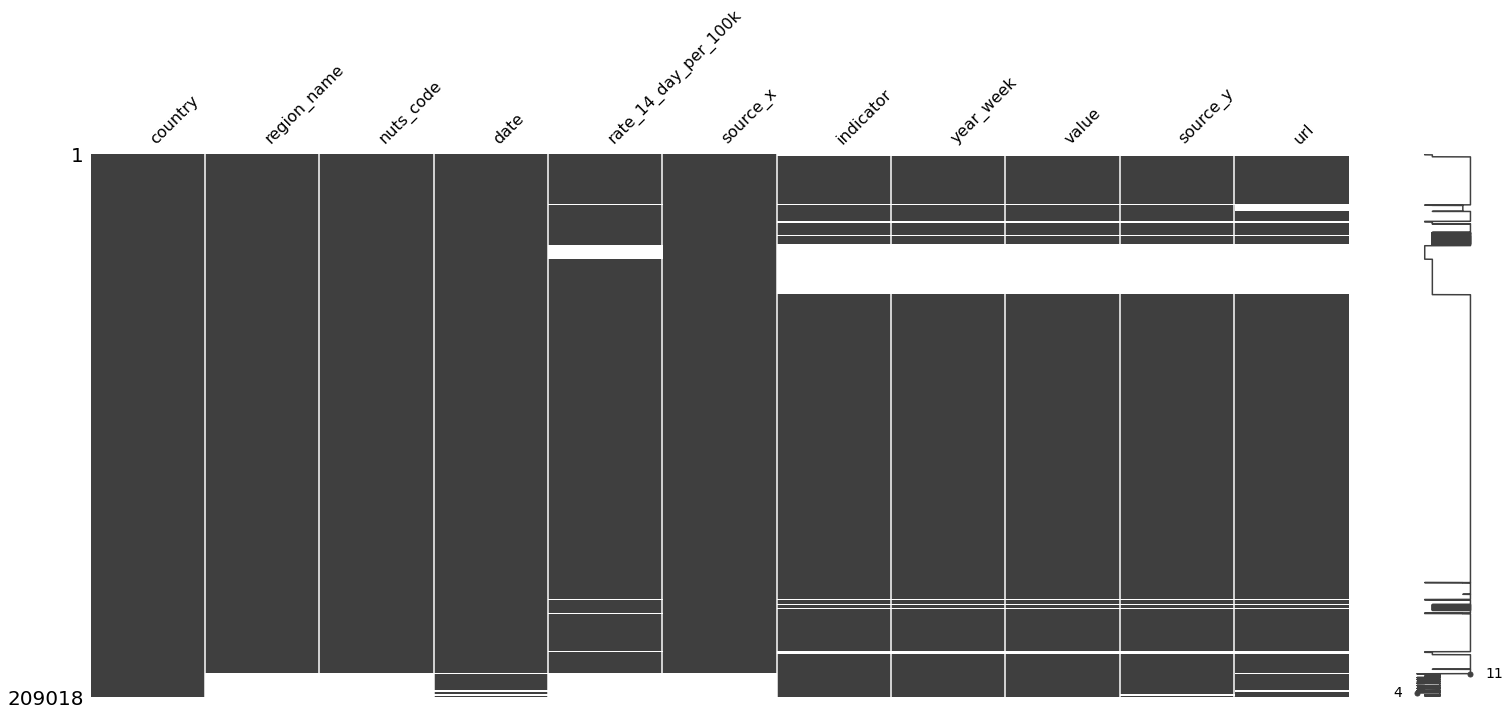

In [6]:
missingno.matrix(merged_daily)

In [7]:
weekly_tests_and_cases = pd.merge(testing, weekly_notification_eu, how='outer', on = ["year_week",'country'])

weekly_tests_and_cases.head()

,country,country_code,year_week,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source,region_name,nuts_code,rate_14_day_per_100k,source
0,Austria,AT,15,1954.0,12339.0,8858775.0,139.285624,15.835967,Manual webscraping,Burgenland,AT11,37.146470,"Epidemic intelligence, subnational weekly data"
1,Austria,AT,15,1954.0,12339.0,8858775.0,139.285624,15.835967,Manual webscraping,Karnten,AT21,25.314696,"Epidemic intelligence, subnational weekly data"
2,Austria,AT,15,1954.0,12339.0,8858775.0,139.285624,15.835967,Manual webscraping,Niederosterreich,AT12,62.055078,"Epidemic intelligence, subnational weekly data"
3,Austria,AT,15,1954.0,12339.0,8858775.0,139.285624,15.835967,Manual webscraping,Oberosterreich,AT31,44.666502,"Epidemic intelligence, subnational weekly data"
4,Austria,AT,15,1954.0,12339.0,8858775.0,139.285624,15.835967,Manual webscraping,Salzburg,AT32,59.976118,"Epidemic intelligence, subnational weekly data"


<AxesSubplot:>

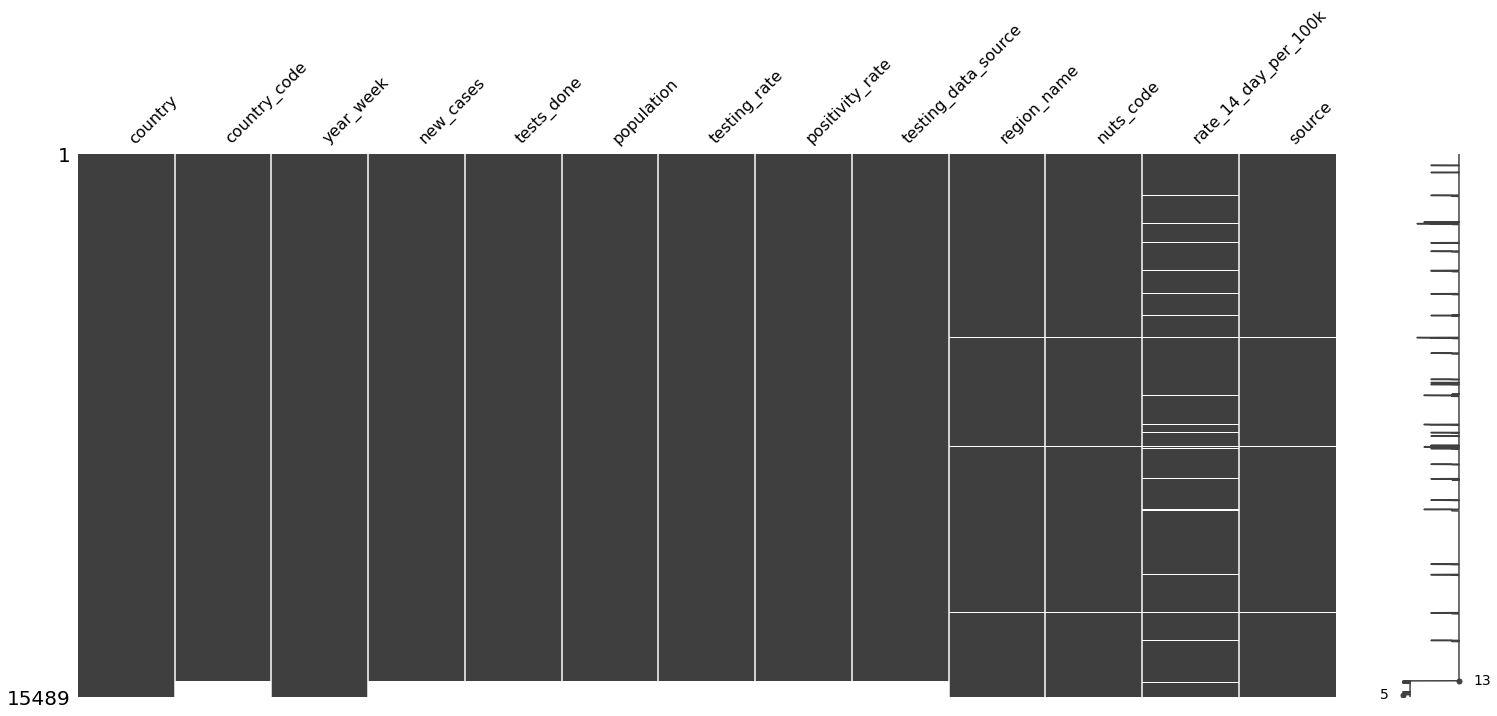

In [8]:
missingno.matrix(weekly_tests_and_cases)

In [9]:
response['Response_measure'].unique()

array(['AdaptationOfWorkplace', 'BanOnAllEvents', 'ClosDaycare',
       'ClosDaycarePartial', 'ClosHigh', 'ClosPrim', 'ClosPrimPartial',
       'ClosPubAny', 'ClosPubAnyPartial', 'ClosSec', 'ClosSecPartial',
       'EntertainmentVenues', 'GymsSportsCentres',
       'HotelsOtherAccommodation', 'IndoorOver100', 'IndoorOver1000',
       'MasksMandatoryAllSpaces', 'MasksMandatoryClosedSpaces',
       'MasksMandatoryClosedSpacesPartial',
       'MasksVoluntaryClosedSpacesPartial', 'MassGather50',
       'MassGatherAll', 'NonEssentialShops', 'NonEssentialShopsPartial',
       'OutdoorOver1000', 'OutdoorOver50', 'OutdoorOver500',
       'PlaceOfWorship', 'PlaceOfWorshipPartial',
       'PrivateGatheringRestrictions', 'RestaurantsCafes', 'SocialCircle',
       'StayHomeGen', 'StayHomeOrder', 'StayHomeOrderPartial',
       'Teleworking', 'EntertainmentVenuesPartial',
       'GymsSportsCentresPartial', 'IndoorOver500',
       'MasksVoluntaryAllSpaces', 'MasksVoluntaryAllSpacesPartial',
       'R

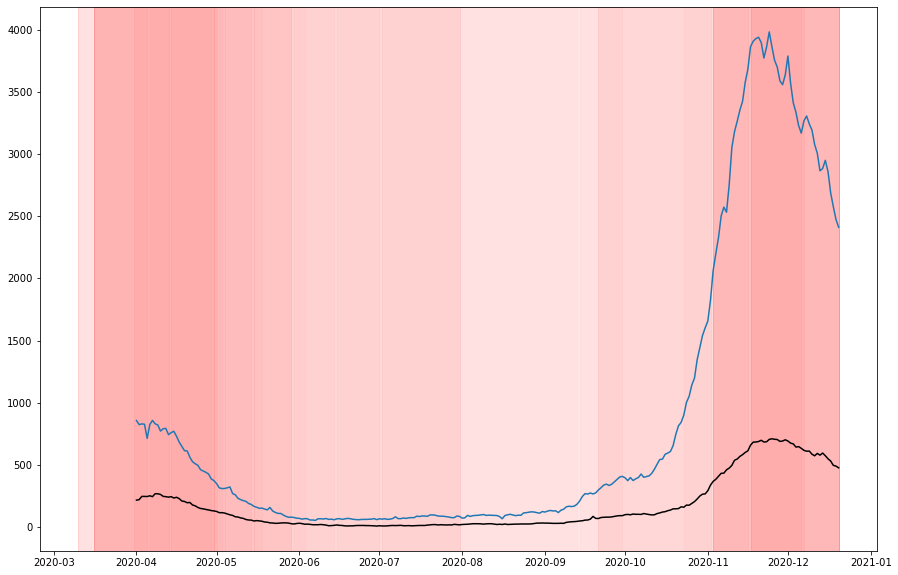

In [10]:
#Sample plot for hospitalizations with govt responses

fig, ax = plt.subplots()
figwidth = 15
fig.set_figwidth(figwidth) 
fig.set_figheight(figwidth*2/3) 
last_date = '2020-12-20'

austria_hospital = admission_rates[(admission_rates['country']=='Austria') & \
                                   (admission_rates['indicator']=='Daily hospital occupancy')]
austria_ICU = admission_rates[(admission_rates['country']=='Austria') & \
                                   (admission_rates['indicator']=='Daily ICU occupancy')]
hospital_date_mask = austria_hospital['date'].notnull()
ICU_date_mask = austria_ICU['date'].notnull()

for index, row in response[(response["Country"] == 'Austria')].iterrows():
    if str(row.date_start) != 'NaT':
        if str(row.date_end) != 'NaT':
            ax.axvspan(row.date_start, row.date_end, color='red', alpha=0.02)
        else:
            ax.axvspan(row.date_start, last_date, color='red', alpha=0.02)


plt.plot(austria_hospital['date'][hospital_date_mask], austria_hospital['value'][hospital_date_mask])
plt.plot(austria_ICU['date'][ICU_date_mask], austria_ICU['value'][ICU_date_mask],color='k')

plt.show()


In [11]:
groups = admission_rates.groupby('indicator')
groups.head()

,country,indicator,date,year_week,value,source,url
0,Austria,Daily hospital occupancy,2020-04-01,14,856.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
1,Austria,Daily hospital occupancy,2020-04-02,14,823.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
2,Austria,Daily hospital occupancy,2020-04-03,14,829.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
3,Austria,Daily hospital occupancy,2020-04-04,14,826.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
4,Austria,Daily hospital occupancy,2020-04-05,14,712.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
264,Austria,Daily ICU occupancy,2020-04-01,14,215.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
265,Austria,Daily ICU occupancy,2020-04-02,14,219.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
266,Austria,Daily ICU occupancy,2020-04-03,14,245.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
267,Austria,Daily ICU occupancy,2020-04-04,14,245.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
268,Austria,Daily ICU occupancy,2020-04-05,14,244.0,Country_Website,https://covid19-dashboard.ages.at/dashboard_Ho...
